# Food Analysis Project

This notebook is a small project where we analyze a food dataset consisting of commodity data pertaining to different countries, food markets, localities and the commodities found there

### Source : https://www.kaggle.com/datasets/jboysen/global-food-prices


Over 740k rows of prices obtained in developing world markets for various goods. Data includes information on country, market, price of good in local currency, quantity of good, and month recorded.

![image](images_notebook/banner_food_proj.png)

# Installing necessary libraries

In [18]:
pip install chardet

  Using cached chardet-5.1.0-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install forex_python

  Using cached forex_python-1.8-py3-none-any.whl (8.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install tqdm

  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [217]:
pip install plotly

  Using cached plotly-5.13.0-py2.py3-none-any.whl (15.2 MB)
Note: you may need to restart the kernel to use updated packages.


# Importing all dependencies

In [14]:
import chardet
import pandas as pd
import numpy as np
import csv
from forex_python.converter import CurrencyRates

# Path Declaration

In [19]:
csv_dataset="/Users/narenkhatwani/Desktop/arkouda-docker/resources/wfp_market_food_prices.csv"
csv_dataset_utf8="/Users/narenkhatwani/Desktop/arkouda-docker/resources/wfp_market_food_prices_utf8.csv"

# Import Arkouda and connecting to the backend server 

In [4]:
import arkouda as ak

    _         _                   _       
   / \   _ __| | _____  _   _  __| | __ _ 
  / _ \ | '__| |/ / _ \| | | |/ _` |/ _` |
 / ___ \| |  |   < (_) | |_| | (_| | (_| |
/_/   \_\_|  |_|\_\___/ \__,_|\__,_|\__,_|
                                          

Client Version: v2023.01.11+4.ge309d0e2


### explain

In [5]:
ak.connect() #connecting to arkouda server

/Users/narenkhatwani/Desktop/arkouda-docker/arkouda/arkouda/client.py:232: RuntimeWarning: Version mismatch between client (v2023.01.11+4.ge309d0e2) and server (v2022.11.17); this may cause some commands to fail or behave incorrectly! Updating arkouda is strongly recommended.
  warnings.warn(
connected to arkouda server tcp://*:5555


# Read the Data

In [55]:
#Printing the first few values from the DataSet
!head "/Users/narenkhatwani/Desktop/arkouda-docker/resources/wfp_market_food_prices.csv"

adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,6,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,7,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,8,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,9,2014,50.0,WFP


In [56]:
#Checking the encoding of the csv file, resolved the partial encoding error
with open(csv_dataset, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

## Column Name Descriptions
1. adm0_id: country id
2. adm0_name: country name
3. adm1_id: locality id
4. adm1_name: locality name
5. mkt_id: market id
6. mkt_name: market name
7. cm_id: commodity purchase id
8. cm_name: commodity purchased
9. cur_id: currency id
10. cur_name: name of currency
11. pt_id: market type id
12. pt_name: market type (Retail/Wholesale/Producer/Farm Gate)
13. um_id: measurement id
14. um_name: unit of goods measurement
15. mp_month: month recorded
16. mpyear: year recorded *mpprice: price paid
17. mp_commoditysource: Source supplying price information

### Reading the csv file and creating a dataframe

In [57]:
df=pd.read_csv(csv_dataset_utf8)

### Displaying the top 5 rows for testing

In [58]:
df.head(5)

adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id cm_name  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   

   cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  mp_year  mp_price  \
0      87      AFN     15  Retail      5      KG         1     2014      50.0   
1      87      AFN     15  Retail      5      KG         2     2014      50.0   
2      87      AFN     15  Retail      5      KG         3     2014      50.0   
3      87      AFN     15  Retail      5      KG         4     2014      50.0   
4      87      AFN     15  Retail      5      KG         5     2014      50.0   

  mp_commoditysource  
0                WFP  
1                WFP  
2                WFP  
3                WFP  
4                WFP

#### In order to read the csv stating a specific encoding we can use the encoding parameter

df=pd.read_csv("/Users/narenkhatwani/Documents/GitHub/arkouda/Notebooks/Resources/wfp_market_food_prices_utf8.csv,encoding='ascii')

# Handling Currency Conversion

Using Forex Python library we can retrieve the latest foreign exchange amount, to convert the product amounts to USD

https://pypi.org/project/forex-python/

In [59]:
c = CurrencyRates()

Create a Dictionary for the same to store the forex values of the other countries

In [16]:
a_dict=c.get_rates('USD')

In [17]:
a_dict.update(USD=1)
a_dict.update(AFN=91.30)

a_dict

{'EUR': 0.8726003490401397,
 'JPY': 113.95287958115185,
 'BGN': 1.7066317626527052,
 'CZK': 22.03664921465969,
 'DKK': 6.489703315881327,
 'GBP': 0.7464048865619547,
 'HUF': 318.324607329843,
 'PLN': 4.03979057591623,
 'RON': 4.317102966841187,
 'SEK': 8.695287958115184,
 'CHF': 0.9215532286212915,
 'ISK': 131.239092495637,
 'NOK': 8.699389179755673,
 'HRK': 6.554799301919721,
 'RUB': 71.14424083769634,
 'TRY': 9.913176265270508,
 'AUD': 1.3698952879581154,
 'BRL': 5.443542757417103,
 'CAD': 1.2582024432809773,
 'CNY': 6.395462478184992,
 'HKD': 7.792233856893543,
 'IDR': 14260.314136125655,
 'INR': 74.44066317626528,
 'KRW': 1180.7417102966842,
 'MXN': 20.538132635253056,
 'MYR': 4.167975567190227,
 'NZD': 1.4239092495636998,
 'PHP': 50.062827225130896,
 'SGD': 1.3539267015706808,
 'THB': 32.85514834205934,
 'ZAR': 15.250872600349041,
 'USD': 1,
 'AFN': 91.3}

Checking the rates and assigning usd =1 as it will be the rate at which other currencies would be converted and updating afn as the last currency rate that was found when it was the last democratic government

Converted the above dictionary to csv with column name cur_name and conversion_rate


In [ ]:
(pd.DataFrame.from_dict(data=a_dict, orient='index').to_csv('/Users/narenkhatwani/Desktop/arkouda-docker/resources/dict_file.csv', header=True))


header = ["cur_name", "conversion_rate"]

with open('/Users/narenkhatwani/Desktop/arkouda-docker/resources/dict_file.csv', 'r') as fp:
    reader = csv.DictReader(fp, fieldnames=header)

    # use newline='' to avoid adding new CR at end of line
    with open('/Users/narenkhatwani/Desktop/arkouda-docker/resources/clean_rates.csv', 'w', newline='') as fh: 
        writer = csv.DictWriter(fh, fieldnames=reader.fieldnames)
        writer.writeheader()
        header_mapping = next(reader)
        writer.writerows(reader)#working

In [47]:
data1 = pd.read_csv(csv_dataset_utf8) 

data2 = pd.read_csv('/Users/narenkhatwani/Desktop/arkouda-docker/resources/clean_rates.csv') 

# using merge function by setting how='left' 

output2 = pd.merge(data1, data2,on='cur_name',how='left') 

# displaying result 

In [48]:
output2.head(5) 

adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id cm_name  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   

   cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  mp_year  mp_price  \
0      87      AFN     15  Retail      5      KG         1     2014      50.0   
1      87      AFN     15  Retail      5      KG         2     2014      50.0   
2      87      AFN     15  Retail      5      KG         3     2014      50.0   
3      87      AFN     15  Retail      5      KG         4     2014      50.0   
4      87      AFN     15  Retail      5      KG         5     2014      50.0   

  mp_commoditysource  conversion_rate  
0                WFP             91.3  
1                WFP             91.3  
2                WFP             91.3  
3                WFP             91.3  
4                WFP             91.3

In [49]:
output3 = output2[output2['conversion_rate'].notna()]

In [50]:
output3.head(5)

adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id cm_name  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   

   cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  mp_year  mp_price  \
0      87      AFN     15  Retail      5      KG         1     2014      50.0   
1      87      AFN     15  Retail      5      KG         2     2014      50.0   
2      87      AFN     15  Retail      5      KG         3     2014      50.0   
3      87      AFN     15  Retail      5      KG         4     2014      50.0   
4      87      AFN     15  Retail      5      KG         5     2014      50.0   

  mp_commoditysource  conversion_rate  
0                WFP             91.3  
1                WFP             91.3  
2                WFP             91.3  
3                WFP             91.3  
4                WFP             91.3

In [97]:
output3.to_csv('/Users/narenkhatwani/Desktop/arkouda-docker/resources/global_food_clean.csv', index=False)

# 2. Cleaning the Data 

## 2.1 Convert the csv to hdf file using to_hdf method of Python (not recommended)

Creating a new dataframe to use it further for conversion

In [70]:
df2=pd.read_csv(csv_dataset_utf8)

The to_hdf() function is used to write the contained data to an HDF5 file using HDFStore.

In [71]:
hdf_via_python="/Users/narenkhatwani/Desktop/arkouda-docker/resources/food_prices_hdf5.h5"

In [72]:
df2.to_hdf(hdf_via_python, 'data', mode='w', format='table')

Similar to pd.read_csv we have read_hdf - Retrieve pandas object stored in file, optionally based on where criteria.

In [74]:
print(pd.read_hdf(hdf_via_python, 'data').head(5))

   adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id cm_name  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   Bread   

   cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  mp_year  mp_price  \
0      87      AFN     15  Retail      5      KG         1     2014      50.0   
1      87      AFN     15  Retail      5      KG         2     2014      50.0   
2      87      AFN     15  Retail      5      KG         3     2014      50.0   
3      87      AFN     15  Retail      5      KG         4     2014      50.0   
4      87      AFN     15  Retail      5      KG         5     2014      50.0   

  mp_commoditysource  
0  

## 2.2 Conversion to .hdf5 using Pandas

In [75]:
pdgreen = pd.read_csv(csv_dataset_utf8)
# transfer columns of DataFrame to arkouda
def ak_create_akdict_from_df(df):
    akdict = {}
    for cname in df.keys():
        if df[cname].dtype.name == 'object':
            akdict[cname] = ak.from_series(df[cname],dtype=str)
        else:
            akdict[cname] = ak.from_series(df[cname])

    return akdict

Passing the dataframe through the converter function to procure hdf file

In [76]:
hdf5_from_pandas = ak_create_akdict_from_df(pdgreen)

Print the converted dataframe to hdf5

In [77]:
print(hdf5_from_pandas)

{'adm0_id': array([1 1 1 ... 70001 70001 70001]), 'adm0_name': array(['Afghanistan', 'Afghanistan', 'Afghanistan', ... , 'South Sudan', 'South Sudan', 'South Sudan']), 'adm1_id': array([272 272 272 ... 2750 2750 2750]), 'adm1_name': array(['Badakhshan', 'Badakhshan', 'Badakhshan', ... , 'Eastern Equatoria', 'Eastern Equatoria', 'Eastern Equatoria']), 'mkt_id': array([266 266 266 ... 1786 1786 1786]), 'mkt_name': array(['Fayzabad', 'Fayzabad', 'Fayzabad', ... , 'Torit', 'Torit', 'Torit']), 'cm_id': array([55 55 55 ... 284 285 285]), 'cm_name': array(['Bread', 'Bread', 'Bread', ... , 'Fuel (diesel)', 'Fuel (petrol-gasoline)', 'Fuel (petrol-gasoline)']), 'cur_id': array([87 87 87 ... 83 83 83]), 'cur_name': array(['AFN', 'AFN', 'AFN', ... , 'SSP', 'SSP', 'SSP']), 'pt_id': array([15 15 15 ... 15 15 15]), 'pt_name': array(['Retail', 'Retail', 'Retail', ... , 'Retail', 'Retail', 'Retail']), 'um_id': array([5 5 5 ... 15 15 15]), 'um_name': array(['KG', 'KG', 'KG', ... , 'L', 'L', 'L']), 'mp_m

Corsscheck by printing a column  

In [79]:
hdf5_from_pandas['adm0_id']

array([1 1 1 ... 70001 70001 70001])

## 2.3 Conversion to .hdf5 using Arkouda

In [81]:
!python3 /Users/narenkhatwani/Desktop/arkouda-docker/arkouda/converter/csv2hdf.py \
--formats-file=/Users/narenkhatwani/Desktop/arkouda-docker/resources/formatter_file/formatter_file.py\
--format=yellow \
--outdir=/Users/narenkhatwani/Desktop/arkouda-docker/resources/ak_hdf5_dataset\
/Users/narenkhatwani/Desktop/arkouda-docker/resources/global_food_clean.csv

Ignoring column adm0_name because dtype "object" has no HDF5 equivalent.
Ignoring column adm1_name because dtype "object" has no HDF5 equivalent.
Ignoring column mkt_name because dtype "object" has no HDF5 equivalent.
Ignoring column cm_name because dtype "object" has no HDF5 equivalent.
Ignoring column cur_name because dtype "object" has no HDF5 equivalent.
Ignoring column pt_name because dtype "object" has no HDF5 equivalent.
Ignoring column um_name because dtype "object" has no HDF5 equivalent.
Ignoring column mp_commoditysource because dtype "object" has no HDF5 equivalent.
Columns to be extracted:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   adm0_id          1000 non-null   int64  
 1   adm1_id          1000 non-null   int64  
 2   mkt_id           1000 non-null   int64  
 3   cm_id            1000 non-null   int64  
 4   cur

# Analysis using Arkouda

Setting the path URL for the hdf5 dataset

In [51]:
hdf5_dataset="/app/global_food_clean.hdf"

Reading the hdf5 file

In [52]:
green_from_HDF5 = ak.read(hdf5_dataset)

Reading all the columns names and displaying them

In [53]:
ak.get_datasets(hdf5_dataset)

['adm0_id',
 'adm1_id',
 'cm_id',
 'conversion_rate',
 'cur_id',
 'mkt_id',
 'mp_month',
 'mp_price',
 'mp_year',
 'pt_id',
 'um_id']

# Basic display of data

Assigning the hdf5 dataset to a variable for further analysis 

In [54]:
data=green_from_HDF5

Printing a pdarray

In [55]:
data['adm0_id']

array([1 1 1 ... 271 271 271])

In [56]:
data['mp_price']

array([50 50 50 ... 0.59999999999999998 0.59999999999999998 0.59999999999999998])

Resultant currency conversion

In [57]:
data['currency_product']=data['mp_price']/data['conversion_rate']

In [58]:
data['currency_product']

array([0.547645125958379 0.547645125958379 0.547645125958379 ... 0.59999999999999998 0.59999999999999998 0.59999999999999998])

In [59]:
green_from_HDF5

{'adm0_id': array([1 1 1 ... 271 271 271]),
 'adm1_id': array([272 272 272 ... 3441 3441 3441]),
 'cm_id': array([55 55 55 ... 264 264 264]),
 'conversion_rate': array([91.299999999999997 91.299999999999997 91.299999999999997 ... 1 1 1]),
 'cur_id': array([87 87 87 ... 28 28 28]),
 'mkt_id': array([266 266 266 ... 1905 1905 1905]),
 'mp_month': array([1 2 3 ... 3 4 5]),
 'mp_price': array([50 50 50 ... 0.59999999999999998 0.59999999999999998 0.59999999999999998]),
 'mp_year': array([2014 2014 2014 ... 2017 2017 2017]),
 'pt_id': array([15 15 15 ... 15 15 15]),
 'um_id': array([5 5 5 ... 5 5 5]),
 'currency_product': array([0.547645125958379 0.547645125958379 0.547645125958379 ... 0.59999999999999998 0.59999999999999998 0.59999999999999998])}

# Print hdf5 dataframe using Pandas 

In [60]:
print("adm0_id adm1_id cm_id conversion_rate cur_id mkt_id mp_month mp_price mp_year pt_id um_id   currency_product")
for i in range (0,9):
     print(f"{data['adm0_id'][i]}         {data['adm1_id'][i]}     {data['cm_id'][i]}    {data['conversion_rate'][i]}        {data['cur_id'][i]}      {data['mkt_id'][i]}      {data['mp_month'][i]}       {data['mp_price'][i]}     {data['mp_year'][i]}     {data['pt_id'][i]}     {data['um_id'][i]}     {data['currency_product'][i]}")

adm0_id adm1_id cm_id conversion_rate cur_id mkt_id mp_month mp_price mp_year pt_id um_id   currency_product
1         272     55    91.3        87      266      1       50.0     2014     15     5     0.547645125958379
1         272     55    91.3        87      266      2       50.0     2014     15     5     0.547645125958379
1         272     55    91.3        87      266      3       50.0     2014     15     5     0.547645125958379
1         272     55    91.3        87      266      4       50.0     2014     15     5     0.547645125958379
1         272     55    91.3        87      266      5       50.0     2014     15     5     0.547645125958379
1         272     55    91.3        87      266      6       50.0     2014     15     5     0.547645125958379
1         272     55    91.3        87      266      7       50.0     2014     15     5     0.547645125958379
1         272     55    91.3        87      266      8       50.0     2014     15     5     0.547645125958379
1         2

# Print hdf5 dataframe using Arkouda

In [61]:
df_test=ak.DataFrame(green_from_HDF5)

In [62]:
df_test.head(5)

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  mp_month  \
0        1      272     55             91.3      87     266         1   
1        1      272     55             91.3      87     266         2   
2        1      272     55             91.3      87     266         3   
3        1      272     55             91.3      87     266         4   
4        1      272     55             91.3      87     266         5   

   mp_price  mp_year  pt_id  um_id  currency_product  
0      50.0     2014     15      5          0.547645  
1      50.0     2014     15      5          0.547645  
2      50.0     2014     15      5          0.547645  
3      50.0     2014     15      5          0.547645  
4      50.0     2014     15      5          0.547645   (5 rows x 12 columns)

# Basic commands to display and filter dataframes 

In [63]:
data['adm0_id']==2

array([False False False ... False False False])

In [64]:
condition=data['adm0_id']<2

In [65]:
data_2=ak.where(condition,data['adm0_id'],data['adm0_id'])

In [66]:
data_2

array([1 1 1 ... 271 271 271])

In [67]:
df_t=ak.DataFrame(green_from_HDF5)

In [68]:
df_t

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  mp_month  \
0             1      272     55             91.3      87     266         1   
1             1      272     55             91.3      87     266         2   
2             1      272     55             91.3      87     266         3   
3             1      272     55             91.3      87     266         4   
4             1      272     55             91.3      87     266         5   
...         ...      ...    ...              ...     ...     ...       ...   
104597      271     3441    264              1.0      28    1905         1   
104598      271     3441    264              1.0      28    1905         2   
104599      271     3441    264              1.0      28    1905         3   
104600      271     3441    264              1.0      28    1905         4   
104601      271     3441    264              1.0      28    1905         5   

        mp_price  mp_year  pt_id  um_id  currency_product  
0          50.00     2014     15      5          0.547645  
1          50.00     2014     15      5          0.547645  
2          50.00     2014     15      5          0.547645  
3          50.00     2014     15      5          0.547645  
4          50.00     2014     15      5          0.547645  
...          ...      ...    ...    ...               ...  
104597      0.55     2017     15      5          0.550000  
104598      0.60     2017     15      5          0.600000  
104599      0.60     2017     15      5          0.600000  
104600      0.60     2017     15      5          0.600000  
104601      0.60     2017     15      5          0.600000   (104602 rows x 12 columns)

In [69]:
df_t['adm0_id', 'cm_id']

adm0_id  cm_id
0             1     55
1             1     55
2             1     55
3             1     55
4             1     55
...         ...    ...
104597      271    264
104598      271    264
104599      271    264
104600      271    264
104601      271    264 (104602 rows x 2 columns)

# Filter data in an hdf5 using Arkouda methods and display it in the form of a dataframe for further analysis

In [70]:
A = ak.arange(0, len(df_t), 1)
indices = df_t['cm_id'] == 55
idx = A[indices]
df_t[idx]

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  mp_month  \
0          1      272     55             91.3      87     266         1   
1          1      272     55             91.3      87     266         2   
2          1      272     55             91.3      87     266         3   
3          1      272     55             91.3      87     266         4   
4          1      272     55             91.3      87     266         5   
..       ...      ...    ...              ...     ...     ...       ...   
315        1    99878     55             91.3      87     275         2   
316        1    99878     55             91.3      87     275         3   
317        1    99878     55             91.3      87     275         4   
318        1    99878     55             91.3      87     275         5   
319        1    99878     55             91.3      87     275         6   

     mp_price  mp_year  pt_id  um_id  currency_product  
0       50.00     2014     15      5          0.547645  
1       50.00     2014     15      5          0.547645  
2       50.00     2014     15      5          0.547645  
3       50.00     2014     15      5          0.547645  
4       50.00     2014     15      5          0.547645  
..        ...      ...    ...    ...               ...  
315     51.72     2017     15      5          0.566484  
316     51.72     2017     15      5          0.566484  
317     51.72     2017     15      5          0.566484  
318     51.72     2017     15      5          0.566484  
319     51.72     2017     15      5          0.566484   (320 rows x 12 columns)

# Finding the most frequently bought commodity using Arkouda

In [71]:
cmd_id = data['cm_id']
cmd_id

array([55 55 55 ... 264 264 264])

Count the number of occurances of a particular commodity id

In [72]:
count_series = ak.array(cmd_id)

In [73]:
val_count = ak.value_counts(count_series)

Prints the frequency array

In [74]:
val_count

(array([50 51 52 ... 461 463 465]), array([174 1549 9031 ... 42 3300 530]))

Gives the max occurances of the frequeny of the commondity purchased

In [75]:
max_count = ak.max(val_count[1])
max_count

9031

# Average price of a commodity in a specific country

In [76]:
df_mean=ak.DataFrame(green_from_HDF5)

In [77]:
df_mean

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  mp_month  \
0             1      272     55             91.3      87     266         1   
1             1      272     55             91.3      87     266         2   
2             1      272     55             91.3      87     266         3   
3             1      272     55             91.3      87     266         4   
4             1      272     55             91.3      87     266         5   
...         ...      ...    ...              ...     ...     ...       ...   
104597      271     3441    264              1.0      28    1905         1   
104598      271     3441    264              1.0      28    1905         2   
104599      271     3441    264              1.0      28    1905         3   
104600      271     3441    264              1.0      28    1905         4   
104601      271     3441    264              1.0      28    1905         5   

        mp_price  mp_year  pt_id  um_id  currency_product  
0          50.00     2014     15      5          0.547645  
1          50.00     2014     15      5          0.547645  
2          50.00     2014     15      5          0.547645  
3          50.00     2014     15      5          0.547645  
4          50.00     2014     15      5          0.547645  
...          ...      ...    ...    ...               ...  
104597      0.55     2017     15      5          0.550000  
104598      0.60     2017     15      5          0.600000  
104599      0.60     2017     15      5          0.600000  
104600      0.60     2017     15      5          0.600000  
104601      0.60     2017     15      5          0.600000   (104602 rows x 12 columns)

#### Filter the dataframe on the basis of cm_id i.e name of the commodity -> considering BREAD cm_id = 55

In [78]:
A = ak.arange(0, len(df_mean), 1)
indices = df_mean['cm_id'] == 55 
idx = A[indices]
df_mean_2=df_mean[idx]
df_mean

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  mp_month  \
0             1      272     55             91.3      87     266         1   
1             1      272     55             91.3      87     266         2   
2             1      272     55             91.3      87     266         3   
3             1      272     55             91.3      87     266         4   
4             1      272     55             91.3      87     266         5   
...         ...      ...    ...              ...     ...     ...       ...   
104597      271     3441    264              1.0      28    1905         1   
104598      271     3441    264              1.0      28    1905         2   
104599      271     3441    264              1.0      28    1905         3   
104600      271     3441    264              1.0      28    1905         4   
104601      271     3441    264              1.0      28    1905         5   

        mp_price  mp_year  pt_id  um_id  currency_product  
0          50.00     2014     15      5          0.547645  
1          50.00     2014     15      5          0.547645  
2          50.00     2014     15      5          0.547645  
3          50.00     2014     15      5          0.547645  
4          50.00     2014     15      5          0.547645  
...          ...      ...    ...    ...               ...  
104597      0.55     2017     15      5          0.550000  
104598      0.60     2017     15      5          0.600000  
104599      0.60     2017     15      5          0.600000  
104600      0.60     2017     15      5          0.600000  
104601      0.60     2017     15      5          0.600000   (104602 rows x 12 columns)

#### Filter the dataframe on the basis of adm0_id i.e name of the country -> considering AFGHANISTAN adm0_id = 1

In [79]:
A = ak.arange(0, len(df_mean_2), 1)
indices = df_mean_2['adm0_id'] == 1 
idx = A[indices]
df_mean_2[idx]

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  mp_month  \
0          1      272     55             91.3      87     266         1   
1          1      272     55             91.3      87     266         2   
2          1      272     55             91.3      87     266         3   
3          1      272     55             91.3      87     266         4   
4          1      272     55             91.3      87     266         5   
..       ...      ...    ...              ...     ...     ...       ...   
315        1    99878     55             91.3      87     275         2   
316        1    99878     55             91.3      87     275         3   
317        1    99878     55             91.3      87     275         4   
318        1    99878     55             91.3      87     275         5   
319        1    99878     55             91.3      87     275         6   

     mp_price  mp_year  pt_id  um_id  currency_product  
0       50.00     2014     15      5          0.547645  
1       50.00     2014     15      5          0.547645  
2       50.00     2014     15      5          0.547645  
3       50.00     2014     15      5          0.547645  
4       50.00     2014     15      5          0.547645  
..        ...      ...    ...    ...               ...  
315     51.72     2017     15      5          0.566484  
316     51.72     2017     15      5          0.566484  
317     51.72     2017     15      5          0.566484  
318     51.72     2017     15      5          0.566484  
319     51.72     2017     15      5          0.566484   (320 rows x 12 columns)

The average price (in USD) of bread in Afghanistan over the span of years is -

In [80]:
mean_compute=df_mean_2[idx]

ak.mean(mean_compute['currency_product'])

0.48421447152245356

## 2.4 Countries IDs and mapping Data for later use

In [81]:
countries_df=pd.read_csv(csv_dataset_utf8)

market_names_dictionary=pd.Series(countries_df.adm0_name.values,index=countries_df.adm0_id).to_dict()

print(market_names_dictionary)

{1: 'Afghanistan', 4: 'Algeria', 13: 'Armenia', 19: 'Azerbaijan', 23: 'Bangladesh', 29: 'Benin', 31: 'Bhutan', 33: 'Bolivia', 42: 'Burkina Faso', 43: 'Burundi', 44: 'Cambodia', 45: 'Cameroon', 47: 'Cape Verde', 49: 'Central African Republic', 50: 'Chad', 57: 'Colombia', 59: 'Congo', 61: 'Costa Rica', 66: "Cote d'Ivoire", 68: 'Democratic Republic of the Congo', 70: 'Djibouti', 75: 'El Salvador', 79: 'Ethiopia', 90: 'Gambia', 92: 'Georgia', 94: 'Ghana', 103: 'Guatemala', 105: 'Guinea-Bissau', 106: 'Guinea', 108: 'Haiti', 111: 'Honduras', 115: 'India', 116: 'Indonesia', 117: 'Iran  (Islamic Republic of)', 118: 'Iraq', 130: 'Jordan', 133: 'Kenya', 138: 'Kyrgyzstan', 139: "Lao People's Democratic Republic", 141: 'Lebanon', 142: 'Lesotho', 144: 'Liberia', 150: 'Madagascar', 152: 'Malawi', 155: 'Mali', 159: 'Mauritania', 170: 'Mozambique', 171: 'Myanmar', 175: 'Nepal', 181: 'Niger', 182: 'Nigeria', 188: 'Pakistan', 191: 'Panama', 195: 'Peru', 196: 'Philippines', 205: 'Rwanda', 217: 'Senegal',

In [82]:
#creating a dataframe
df_country_ids = pd.DataFrame()
#giving column names in the dataframe to the dictionary key-values
df_country_ids['adm0_id'] = market_names_dictionary.keys()
df_country_ids['adm0_name'] = market_names_dictionary.values()

In [83]:
df_country_ids.head(20)

adm0_id                         adm0_name
0         1                       Afghanistan
1         4                           Algeria
2        13                           Armenia
3        19                        Azerbaijan
4        23                        Bangladesh
5        29                             Benin
6        31                            Bhutan
7        33                           Bolivia
8        42                      Burkina Faso
9        43                           Burundi
10       44                          Cambodia
11       45                          Cameroon
12       47                        Cape Verde
13       49          Central African Republic
14       50                              Chad
15       57                          Colombia
16       59                             Congo
17       61                        Costa Rica
18       66                     Cote d'Ivoire
19       68  Democratic Republic of the Congo

In [84]:
df_country_ids_sorted=df_country_ids.sort_values(["adm0_id", "adm0_name"], ascending=True)
df_country_ids_sorted.head(5)

adm0_id    adm0_name
0        1  Afghanistan
1        4      Algeria
2       13      Armenia
3       19   Azerbaijan
4       23   Bangladesh

## 2.5 Food item Mapping

As arkouda can only deal with numerical data, when we take out a pandas dataframe for analysis this will help us join the content with the dataframe

In [25]:
food_item_df=pd.read_csv(csv_dataset_utf8)

Converting the unique values to a dictionary for further join function

In [26]:
food_names_dictionary=pd.Series(food_item_df.cm_name.values,index=food_item_df.cm_id).to_dict()
print(food_names_dictionary)

{55: 'Bread', 84: 'Wheat', 145: 'Rice (low quality)', 274: 'Wage (qualified labour)', 275: 'Livestock (sheep, one-year-old alive female)', 284: 'Fuel (diesel)', 305: 'Exchange rate', 465: 'Wage (non-qualified labour, non-agricultural)', 52: 'Rice', 66: 'Beans (white)', 81: 'Milk', 83: 'Potatoes', 92: 'Eggs', 94: 'Meat (chicken)', 97: 'Sugar', 108: 'Lentils', 112: 'Pasta', 114: 'Tomatoes', 137: 'Oil', 142: 'Cheese (dry)', 166: 'Carrots', 173: 'Onions', 254: 'Bananas', 281: 'Tea', 285: 'Fuel (petrol-gasoline)', 343: 'Fish (canned)', 345: 'Apples', 342: 'Milk (camel)', 344: 'Meat (camel)', 357: 'Tea (sahm)', 58: 'Wheat flour', 96: 'Oil (vegetable)', 133: 'Rice (white)', 140: 'Meat (pork)', 141: 'Meat (beef)', 181: 'Cabbage', 229: 'Apples (red)', 233: 'Cucumbers (greenhouse)', 283: 'Fuel (kerosene)', 401: 'Fish (fresh)', 459: 'Bread (high grade flour)', 460: 'Bread (first grade flour)', 102: 'Milk (non-pasteurized)', 60: 'Rice (coarse)', 61: 'Lentils (masur)', 62: 'Oil (palm)', 64: 'Rice (

Creating a dataframe

In [27]:
df_food_ids = pd.DataFrame()

Giving column names in the dataframe to the dictionary key-values

In [28]:
df_food_ids['cm_id'] = food_names_dictionary.keys()
df_food_ids['cm_name'] = food_names_dictionary.values()

Verifying the dataframe

In [29]:
df_food_ids.head(10)

cm_id                                        cm_name
0     55                                          Bread
1     84                                          Wheat
2    145                             Rice (low quality)
3    274                        Wage (qualified labour)
4    275   Livestock (sheep, one-year-old alive female)
5    284                                  Fuel (diesel)
6    305                                  Exchange rate
7    465  Wage (non-qualified labour, non-agricultural)
8     52                                           Rice
9     66                                  Beans (white)

## Finding items and their average rates in India

In [85]:
items_result = data['adm0_id'] == 115

In [86]:
#items_result = ((data['currency_product'] > 10) & (data['adm0_id'] == 115))
convert_to_pandas = pd.DataFrame({k: v[items_result].to_ndarray() for k, v in data.items()})

In [87]:
convert_to_pandas.head(10)

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  mp_month  \
0      115     1509     52        81.793648      68     921         1   
1      115     1509     52        81.793648      68     921         3   
2      115     1509     52        81.793648      68     921         4   
3      115     1509     52        81.793648      68     921         5   
4      115     1509     52        81.793648      68     921         6   
5      115     1509     52        81.793648      68     921         7   
6      115     1509     52        81.793648      68     921         8   
7      115     1509     52        81.793648      68     921         9   
8      115     1509     52        81.793648      68     921        10   
9      115     1509     52        81.793648      68     921        11   

   mp_price  mp_year  pt_id  um_id  currency_product  
0      8.00     1996     15      5          0.097807  
1      8.50     1996     15      5          0.103920  
2      8.75     1996     15      5          0.106977  
3      8.75     1996     15      5          0.106977  
4      8.50     1996     15      5          0.103920  
5      9.00     1996     15      5          0.110033  
6      9.00     1996     15      5          0.110033  
7      9.00     1996     15      5          0.110033  
8      9.00     1996     15      5          0.110033  
9      9.00     1996     15      5          0.110033

In [88]:
country_specific=convert_to_pandas.merge(df_country_ids,on='adm0_id',how='left')
item_specific=country_specific.merge(df_food_ids,on='cm_id',how='left')
item_specific

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  mp_month  \
0          115     1509     52        81.793648      68     921         1   
1          115     1509     52        81.793648      68     921         3   
2          115     1509     52        81.793648      68     921         4   
3          115     1509     52        81.793648      68     921         5   
4          115     1509     52        81.793648      68     921         6   
...        ...      ...    ...              ...     ...     ...       ...   
68303      115        0    463        81.793648      68    1887        12   
68304      115        0    463        81.793648      68    1887         1   
68305      115        0    463        81.793648      68    1887         2   
68306      115        0    463        81.793648      68    1887         3   
68307      115        0    463        81.793648      68    1887         4   

       mp_price  mp_year  pt_id  um_id  currency_product adm0_name  \
0          8.00     1996     15      5          0.097807     India   
1          8.50     1996     15      5          0.103920     India   
2          8.75     1996     15      5          0.106977     India   
3          8.75     1996     15      5          0.106977     India   
4          8.50     1996     15      5          0.103920     India   
...         ...      ...    ...    ...               ...       ...   
68303     40.20     2016     15     15          0.491481     India   
68304     40.56     2017     15     15          0.495882     India   
68305     40.45     2017     15     15          0.494537     India   
68306     40.92     2017     15     15          0.500283     India   
68307     41.24     2017     15     15          0.504196     India   

                  cm_name  
0                    Rice  
1                    Rice  
2                    Rice  
3                    Rice  
4                    Rice  
...                   ...  
68303  Milk (pasteurized)  
68304  Milk (pasteurized)  
68305  Milk (pasteurized)  
68306  Milk (pasteurized)  
68307  Milk (pasteurized)  

[68308 rows x 14 columns]

In [89]:
print('SORTED DATAFRAME')
item_specific=item_specific.sort_values(by = ['cm_name', 'mp_year'], ascending = [False, True], na_position = 'first')
item_specific.head(10)

SORTED DATAFRAME


adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  mp_month  \
248       115     1509     58        81.793648      68     921         4   
249       115     1509     58        81.793648      68     921         5   
250       115     1509     58        81.793648      68     921         6   
251       115     1509     58        81.793648      68     921         7   
252       115     1509     58        81.793648      68     921         8   
253       115     1509     58        81.793648      68     921         9   
254       115     1509     58        81.793648      68     921        10   
255       115     1509     58        81.793648      68     921        11   
256       115     1509     58        81.793648      68     921        12   
1385      115     1510     58        81.793648      68     922         4   

      mp_price  mp_year  pt_id  um_id  currency_product adm0_name      cm_name  
248      21.00     2012     15      5          0.256744     India  Wheat flour  
249      21.00     2012     15      5          0.256744     India  Wheat flour  
250      21.00     2012     15      5          0.256744     India  Wheat flour  
251      19.40     2012     15      5          0.237182     India  Wheat flour  
252      19.00     2012     15      5          0.232292     India  Wheat flour  
253      19.00     2012     15      5          0.232292     India  Wheat flour  
254      19.00     2012     15      5          0.232292     India  Wheat flour  
255      19.00     2012     15      5          0.232292     India  Wheat flour  
256      19.00     2012     15      5          0.232292     India  Wheat flour  
1385     14.56     2012     15      5          0.178009     India  Wheat flour

In [90]:
item_specific.to_csv('/Users/narenkhatwani/Desktop/pandas_output.csv', index=False)

# Visualization of the Dataframe

## The following visualization is just showing the basic difference in prices of various item of a country over the span of which the data is available in the dataset.

![image](images_notebook/5.png)

## Using Matplotlib 

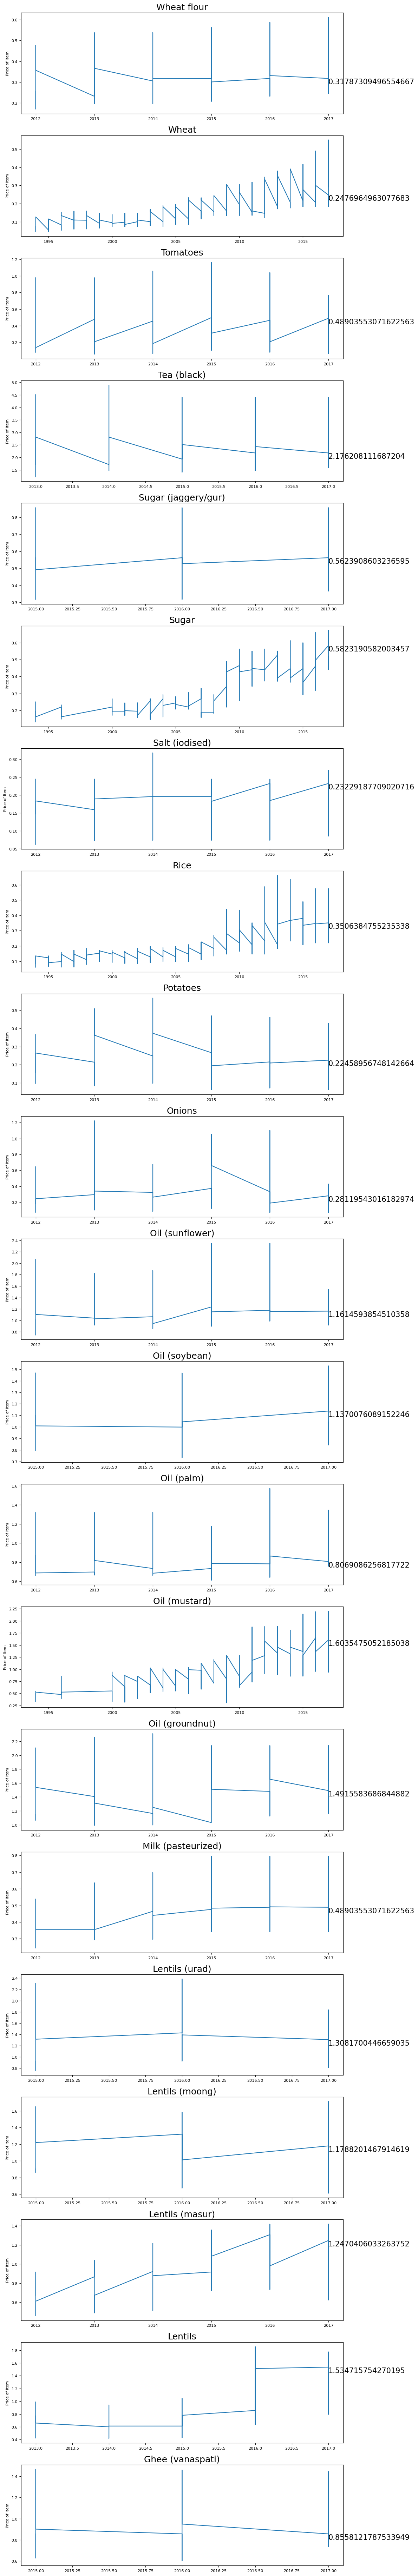

In [93]:
import matplotlib.pyplot as plt
items_list = item_specific['cm_name'].unique().tolist()
fig, ax = plt.subplots(nrows=len(items_list), figsize=(12,len(items_list)*3.5)) #dynamically set the figure size from the number of subplots. I find that 3.5 is a good height per subplot to see the data

for i in items_list:
    ind = items_list.index(i) #a trick to get a list of 0 to whatever 
    filt = item_specific['cm_name'] == i #filter the dataframe for each item in the list
    
    ax[ind].plot(item_specific.loc[filt]['mp_year'],item_specific.loc[filt]['currency_product']) #plotting the filtered dataframe. The brackets make the axis variable dynamic
    ax[ind].set_title(i, size=18) #here I am setting the title of each subplot to be the category
    ax[ind].set_ylabel('Price of Item', size=8) #setting the ylabel and font size
    ax[ind].xaxis.set_tick_params(labelsize=8) #setting the font size of the x axis
    ax[ind].yaxis.set_tick_params(labelsize=8) #setting the font size of the y axis
    
    #Optionally add data labels or text to the subplots
    cases_yesterday_filter = (item_specific['mp_year'] == item_specific['mp_year'].max()) & (item_specific['cm_name'] == i) 
    cases_yesterday = item_specific.loc[cases_yesterday_filter].iloc[0]['currency_product'] #applying the filter to the dataframe
    ax[ind].annotate(str(cases_yesterday), xy=(item_specific['mp_year'].max(),cases_yesterday),xycoords = 'data', ha ='left', va='top', fontsize =15) #adding the datapoint to the subplot
    plt.tight_layout()

plt.savefig("/Users/narenkhatwani/Desktop/myImagePDF.pdf", format="pdf", bbox_inches="tight")

## Using Plotly

In [91]:
item_specific

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  mp_month  \
248        115     1509     58        81.793648      68     921         4   
249        115     1509     58        81.793648      68     921         5   
250        115     1509     58        81.793648      68     921         6   
251        115     1509     58        81.793648      68     921         7   
252        115     1509     58        81.793648      68     921         8   
...        ...      ...    ...              ...     ...     ...       ...   
67848      115    70074    333        81.793648      68    1785         6   
68266      115        0    333        81.793648      68    1887         1   
68267      115        0    333        81.793648      68    1887         2   
68268      115        0    333        81.793648      68    1887         3   
68269      115        0    333        81.793648      68    1887         4   

       mp_price  mp_year  pt_id  um_id  currency_product adm0_name  \
248       21.00     2012     15      5          0.256744     India   
249       21.00     2012     15      5          0.256744     India   
250       21.00     2012     15      5          0.256744     India   
251       19.40     2012     15      5          0.237182     India   
252       19.00     2012     15      5          0.232292     India   
...         ...      ...    ...    ...               ...       ...   
67848     65.17     2017     15      5          0.796761     India   
68266     77.57     2017     15      5          0.948362     India   
68267     77.79     2017     15      5          0.951052     India   
68268     77.72     2017     15      5          0.950196     India   
68269     77.35     2017     15      5          0.945672     India   

                cm_name  
248         Wheat flour  
249         Wheat flour  
250         Wheat flour  
251         Wheat flour  
252         Wheat flour  
...                 ...  
67848  Ghee (vanaspati)  
68266  Ghee (vanaspati)  
68267  Ghee (vanaspati)  
68268  Ghee (vanaspati)  
68269  Ghee (vanaspati)  

[68308 rows x 14 columns]

In [92]:
#countries_list_top_20 = output3['cm_name'].unique()
import matplotlib.pyplot as plt
import plotly.express as px
items_list = item_specific['cm_name'].unique().tolist()
#fig, ax = plt.subplots(nrows=len(items_list), figsize=(12,len(items_list)*3.5)) #dynamically set the figure size from the number of subplots. I find that 3.5 is a good height per subplot to see the data

for i in items_list:
    ind = items_list.index(i) #a trick to get a list of 0 to whatever 
    filt = item_specific['cm_name'] == i #filter the dataframe for each item in the list
    print(i)
    fig = px.bar(x=item_specific.loc[filt]['mp_year'], y=item_specific.loc[filt]['currency_product'], labels={'x':'Year', 'y':'Price in $'})
    fig.show()


Wheat flour


Wheat


Tomatoes


Tea (black)


Sugar (jaggery/gur)


Sugar


Salt (iodised)


Rice


Potatoes


Onions


Oil (sunflower)


Oil (soybean)


Oil (palm)


Oil (mustard)


Oil (groundnut)


Milk (pasteurized)


Lentils (urad)


Lentils (moong)


Lentils (masur)


Lentils


Ghee (vanaspati)


# Arkouda Operations for beginners

![image](images_notebook/4.png)

## Vector and Scalar Arithmetic

In [96]:
A = ak.arange(10)
A += 2
A

array([2 3 4 5 6 7 8 9 10 11])

In [97]:
A + A

array([4 6 8 10 12 14 16 18 20 22])

In [98]:
2 * A

array([4 6 8 10 12 14 16 18 20 22])

In [99]:
A == A

array([True True True True True True True True True True])

## pdArray Set Operations

In [100]:
a = ak.array([4, 2, 5, 6, 4, 7, 2])
b = ak.array([1, 5, 4, 11, 9, 6])

In [104]:
#minimum k elements
ak.mink(a, 3)

array([2 2 4])

In [105]:
#maximum k elements
ak.maxk(a, 3)

array([5 6 7])

In [106]:
#maximum element
ak.max(a)

7

In [107]:
#minimum element
ak.min(a)

2

In [101]:
# compute boolean array indicating the values from a found in b.
ak_in1d = ak.in1d(a, b)
ak_in1d

array([True False True True True False False])

In [102]:
# compute array of unique values found in a and b
ak_int = ak.intersect1d(a, b)

In [103]:
ak_int

array([4 5 6])

# Arkouda Configuration

In [116]:
cfg=ak.get_config()

In [117]:
cfg

{'arkoudaVersion': 'v2022.11.17',
 'chplVersion': '1.28.0',
 'ZMQVersion': '4.3.4',
 'HDF5Version': '1.12.1',
 'serverHostname': 'f39dd818fe59',
 'ServerPort': 5555,
 'numLocales': 1,
 'numPUs': 5,
 'maxTaskPar': 5,
 'physicalMemory': 8232894464,
 'distributionType': 'BlockDom(1,int(64),false,unmanaged DefaultDist)',
 'LocaleConfigs': [{'id': 0,
   'name': 'f39dd818fe59-0',
   'numPUs': 5,
   'maxTaskPar': 5,
   'physicalMemory': 8232894464}],
 'authenticate': False,
 'logLevel': 'INFO',
 'regexMaxCaptures': 20,
 'byteorder': 'little',
 'ARROW_VERSION': '9.0.0'}